In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns',None)

In [3]:
from sklearn.datasets import load_boston
boston=load_boston()
print(boston.DESCR)
boston_df=boston.data

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['target']=boston.target

In [12]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


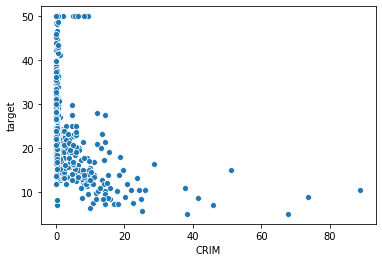

In [13]:
sns.scatterplot(data=boston_df,x='CRIM',y='target')

In [14]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

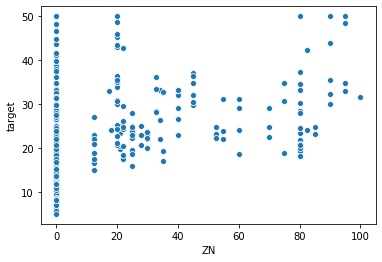

In [15]:
sns.scatterplot(data=boston_df,x='ZN',y='target')

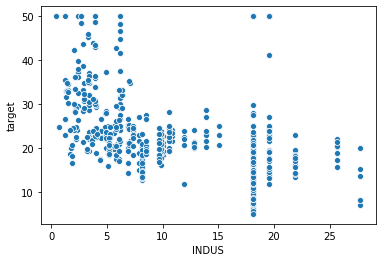

In [16]:
sns.scatterplot(data=boston_df,x='INDUS',y='target')

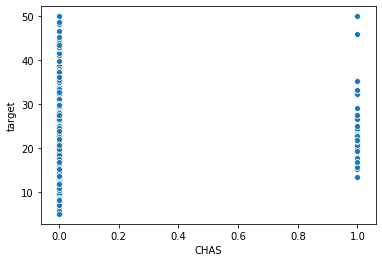

In [17]:
sns.scatterplot(data=boston_df,x='CHAS',y='target')

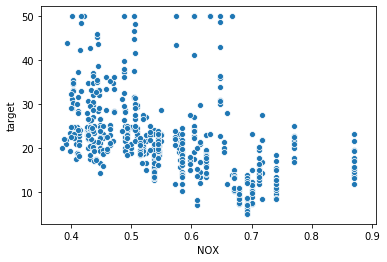

In [27]:
sns.scatterplot(data=boston_df,x='NOX',y='target')

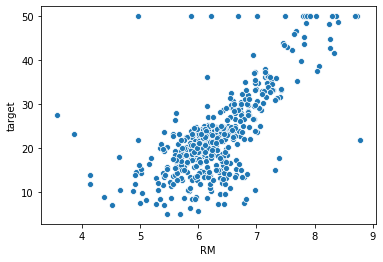

In [28]:
sns.scatterplot(data=boston_df,x='RM',y='target')

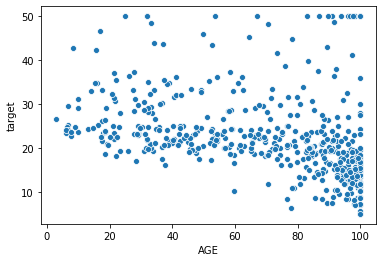

In [29]:
sns.scatterplot(data=boston_df,x='AGE',y='target')

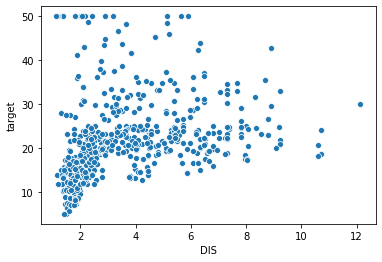

In [30]:
sns.scatterplot(data=boston_df,x='DIS',y='target')

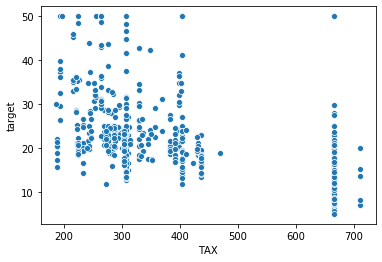

In [32]:
sns.scatterplot(data=boston_df,x='TAX',y='target')

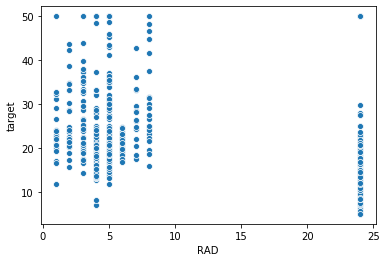

In [31]:
sns.scatterplot(data=boston_df,x='RAD',y='target')

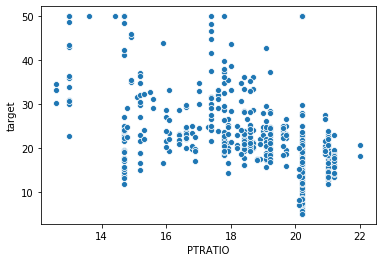

In [33]:
sns.scatterplot(data=boston_df,x='PTRATIO',y='target')

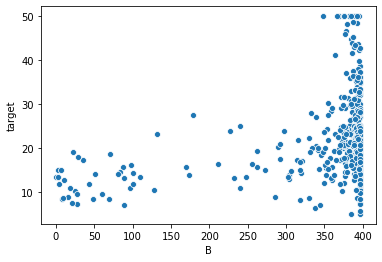

In [35]:
sns.scatterplot(data=boston_df,x='B',y='target')

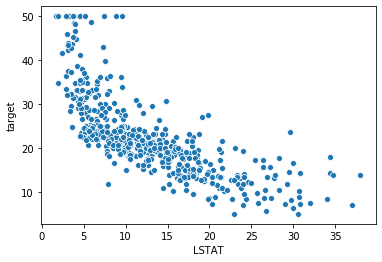

In [36]:
sns.scatterplot(data=boston_df,x='LSTAT',y='target')

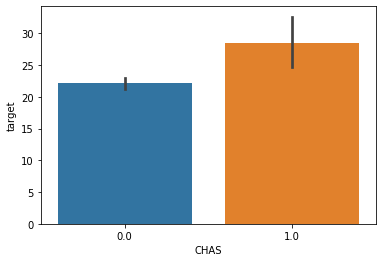

In [20]:
sns.barplot(data=boston_df,x='CHAS',y='target')

In [22]:
boston_df.groupby('CHAS')['target'].value_counts()

CHAS  target
0.0   50.0      10
      25.0       8
      22.0       7
      23.1       7
      19.4       6
                ..
1.0   32.4       1
      33.1       1
      33.2       1
      35.2       1
      46.0       1
Name: target, Length: 249, dtype: int64

In [26]:
boston_df.corr()['target']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
target     1.000000
Name: target, dtype: float64

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor,XGBRFRegressor

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
X=boston_df.drop('target',axis=1)
y=boston_df['target']

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [94]:
scaled_features=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS',
       'TAX', 'PTRATIO', 'B', 'LSTAT']

In [95]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [96]:
labeled_features=['ZN']

In [97]:
X_test.shape

(167, 13)

In [98]:
X_train.shape

(339, 13)

In [99]:
boston_df['ZN'].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [100]:
boston_df.shape

(506, 14)

In [101]:
scaler=MinMaxScaler()

In [102]:
X_train[scaled_features]=scaler.fit_transform(X_train[scaled_features])
X_test[scaled_features]=scaler.transform(X_test[scaled_features])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

In [103]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
478,0.114918,0.000000,0.636638,0.0,0.471193,0.472239,0.966014,0.094654,24.0,0.914122,0.808511,0.956629,0.449779
26,0.007451,0.000000,0.261214,0.0,0.314815,0.396583,0.900103,0.323036,4.0,0.229008,0.893617,0.949518,0.360927
7,0.001523,0.131579,0.251037,0.0,0.286008,0.469595,0.959835,0.438387,5.0,0.236641,0.276596,1.000000,0.480684
492,0.001149,0.000000,1.000000,0.0,0.460905,0.431157,0.830072,0.089143,4.0,1.000000,0.797872,1.000000,0.320640
108,0.001337,0.000000,0.277045,0.0,0.277778,0.531015,0.970134,0.118515,5.0,0.375954,0.882979,0.995814,0.290839
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.001822,0.000000,0.277045,0.0,0.277778,0.401261,0.916581,0.098337,5.0,0.375954,0.882979,0.996898,0.467163
270,0.003261,0.210526,0.216736,0.0,0.162551,0.405328,0.403708,0.300030,3.0,0.068702,0.638298,0.979197,0.310982
348,0.000067,0.842105,0.030155,0.0,0.102881,0.563758,0.276004,0.656039,4.0,0.177481,0.468085,0.984972,0.117550
435,0.125342,0.000000,0.636638,0.0,0.730453,0.562538,0.944387,0.090489,24.0,0.914122,0.808511,0.276186,0.594371


In [104]:
from sklearn.model_selection import cross_val_score

In [122]:
xgboost_cv=cross_val_score(XGBRegressor(),X=X_train,y=y_train,cv=5)

In [123]:
xgboost_cv.mean()

0.8118475520218915

In [124]:
xgboost_cv.std()

0.050062489304105985

In [109]:
rfc_cv=cross_val_score(RandomForestRegressor(),X=X_train,y=y_train,cv=5)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

In [110]:
rfc_cv.mean()

0.8011299758827336

In [111]:
rfc_cv.std()

0.056758211206334716

In [127]:
xgboostf_cv=cross_val_score(XGBRFRegressor(),X=X_train,y=y_train,cv=5)

In [128]:
xgboostf_cv.mean()

0.810240407193502

In [129]:
xgboostf_cv.std()

0.07460234500936372

In [112]:
svr_cv=cross_val_score(SVR(),X=X_train,y=y_train,cv=5)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

In [113]:
svr_cv.mean()

0.24778507933608598

In [114]:
svr_cv.std()

0.07157317667172731

In [116]:
linear_cv=cross_val_score(LinearRegression(),X=X_train,y=y_train,cv=5)

In [117]:
linear_cv.mean()

0.7081605671462448

In [118]:
linear_cv.std()

0.042107273563535615

In [130]:
xgb=XGBRegressor(n_estimators=1000)

In [131]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [132]:
predict=xgb.predict(X_test)

In [141]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
110    21.7
321    23.1
265    22.8
29     21.0
262    48.8
Name: target, Length: 167, dtype: float64

In [133]:
predict

array([24.577133 , 32.860443 , 13.953407 , 23.172253 , 17.13673  ,
       21.80493  , 19.146545 , 13.815258 , 21.724743 , 21.158049 ,
       20.605272 , 19.002314 ,  9.906144 , 20.315393 , 19.3903   ,
       27.259949 , 19.22038  ,  8.997838 , 46.17655  , 15.674923 ,
       24.202192 , 26.147505 , 13.70837  , 21.260338 , 17.020473 ,
       15.671387 , 22.408443 , 12.8626   , 19.83483  , 20.859564 ,
       19.063211 , 24.691961 , 23.679335 , 20.458853 , 16.173927 ,
       16.694885 , 31.943121 , 18.963446 , 21.845823 , 24.572395 ,
       14.26781  , 29.012165 , 46.23818  , 19.215698 , 22.401287 ,
       13.213395 , 15.952515 , 24.6214   , 20.038975 , 28.019775 ,
       22.481228 , 34.351288 , 18.054565 , 26.679548 , 48.617905 ,
       21.553207 , 16.464222 , 32.21209  , 21.817625 , 18.323942 ,
       24.879215 , 33.506325 , 31.863297 , 19.317266 , 21.213911 ,
       15.3804245, 13.379598 , 23.242785 , 30.149837 , 14.91393  ,
       22.170105 , 27.753326 , 11.72796  , 21.193106 , 21.2199

In [134]:
from sklearn.metrics import mean_squared_error

In [139]:
y_test.max()

50.0

In [140]:
y_test.mean()

21.643712574850294

In [138]:
y_test.min()

5.0

In [135]:
mean_squared_error(y_test,predict)**0.5

3.1130404688895843